# Introduction

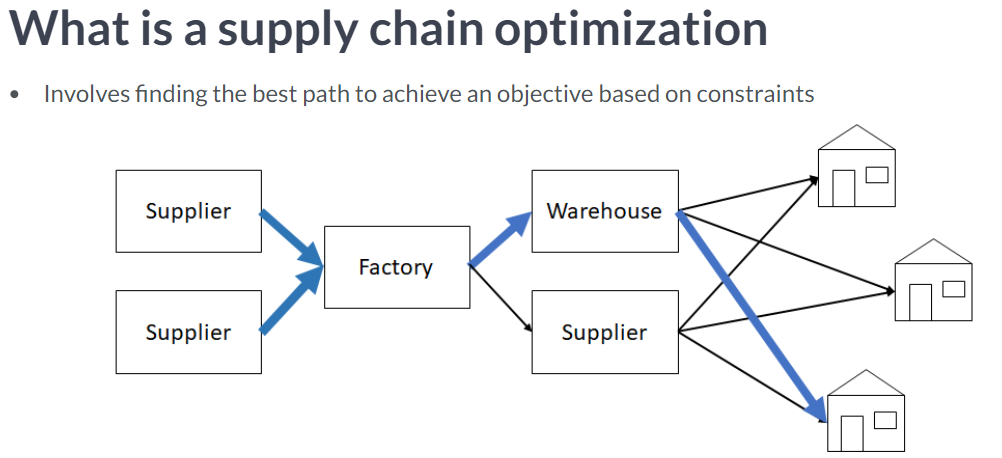

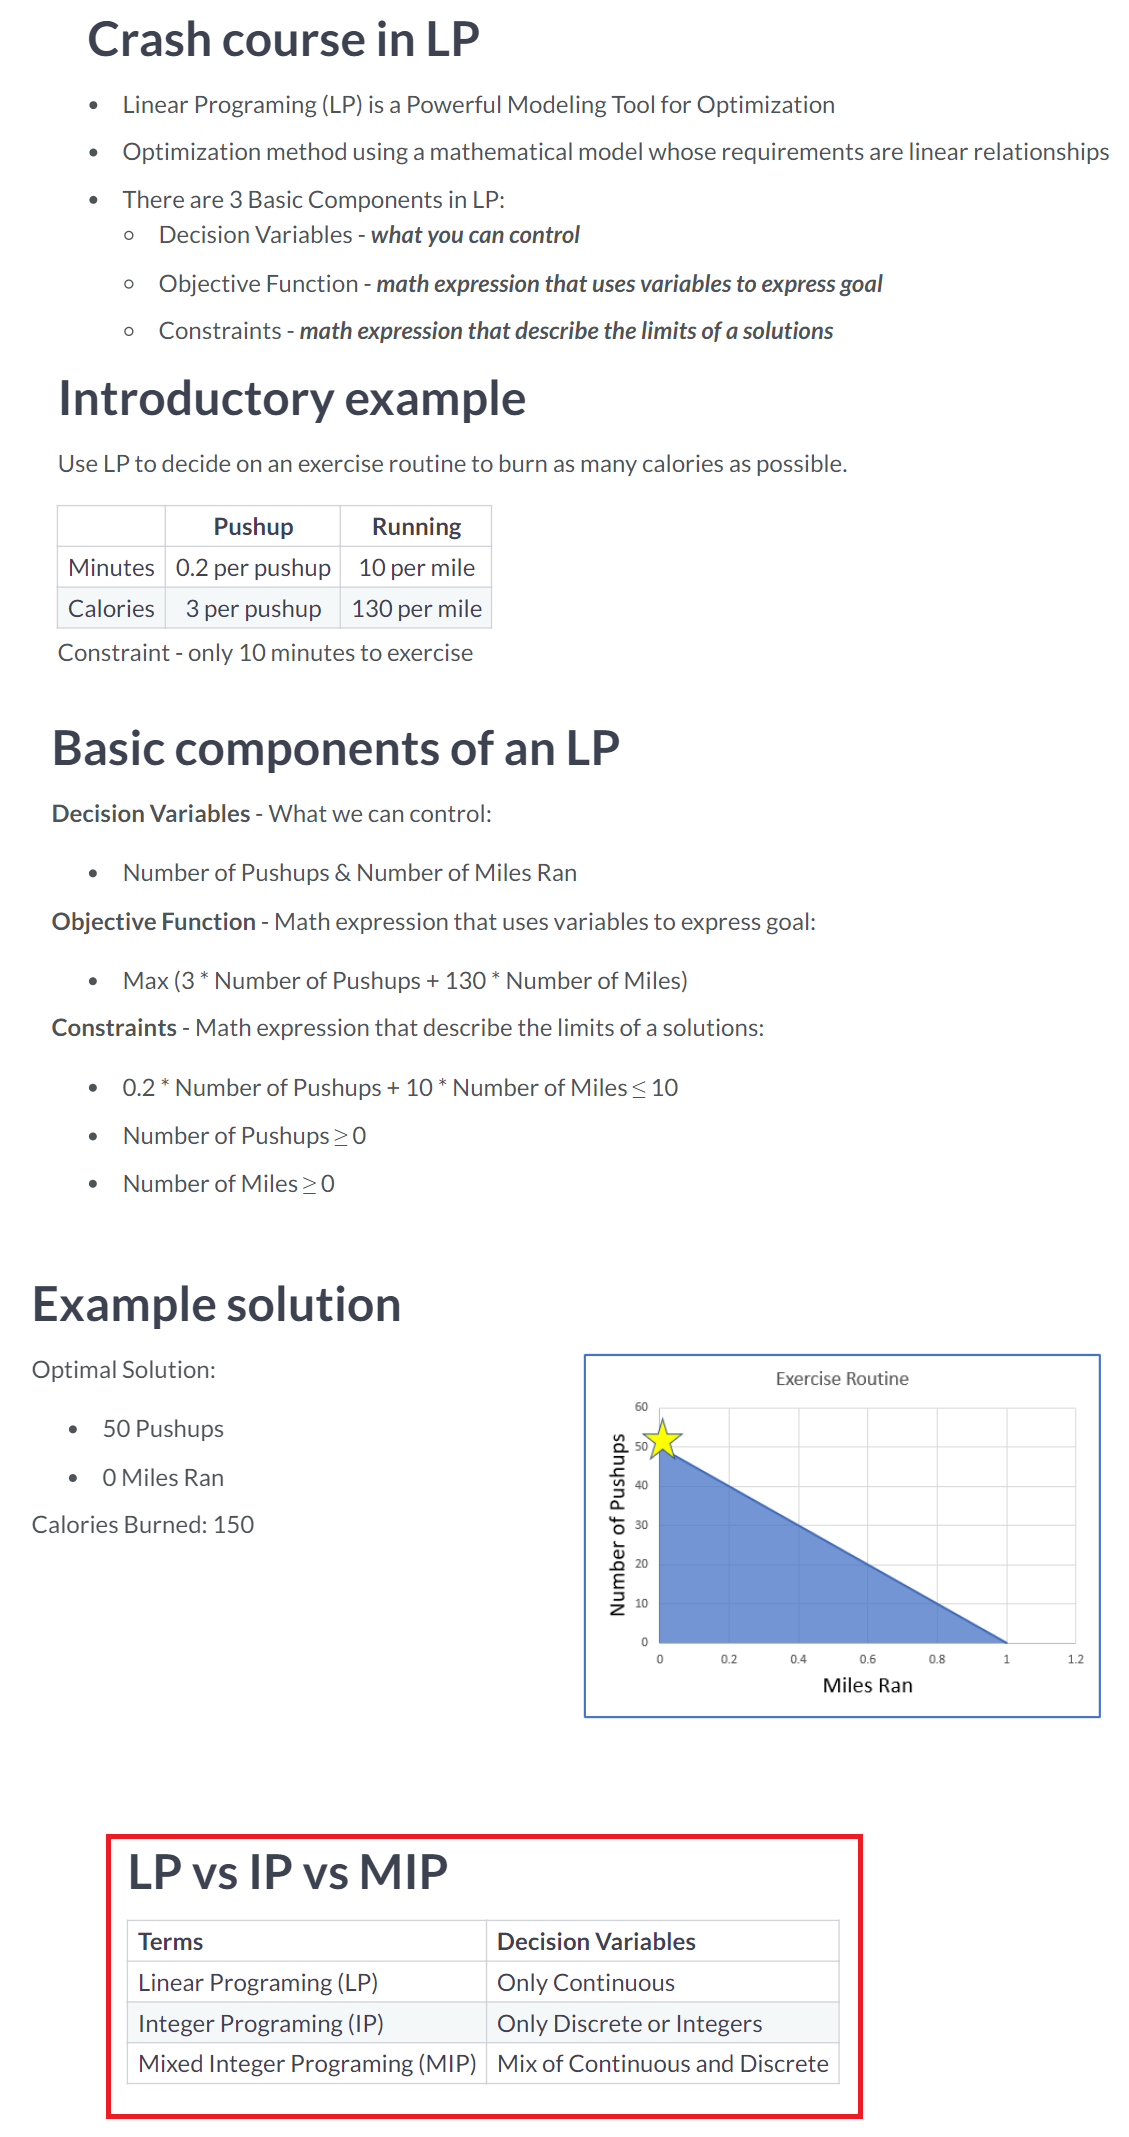

# PuLP modeling


## Intro and Basic Example(Format)

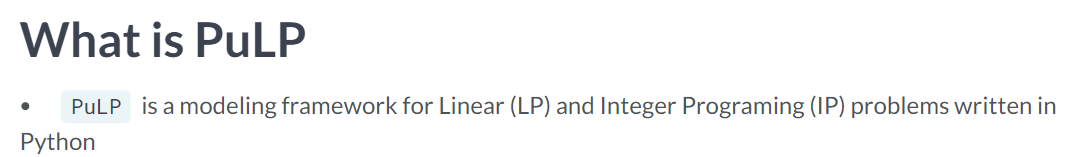

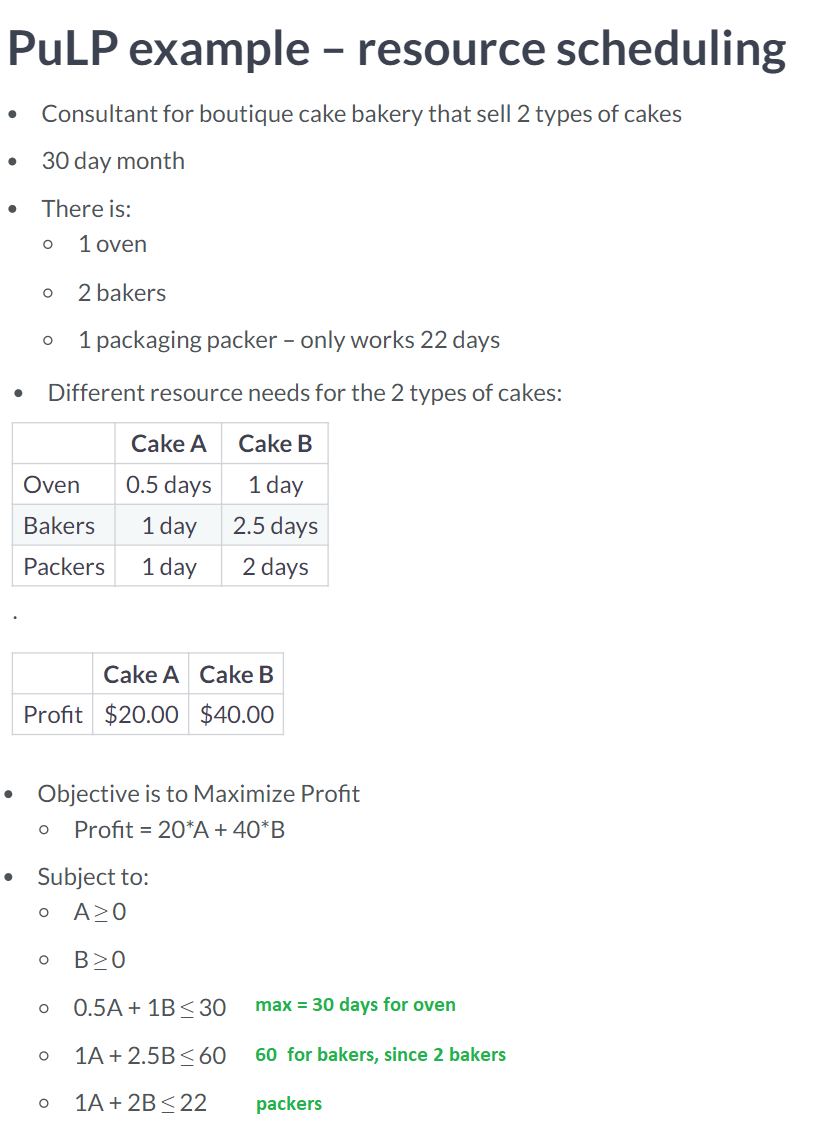

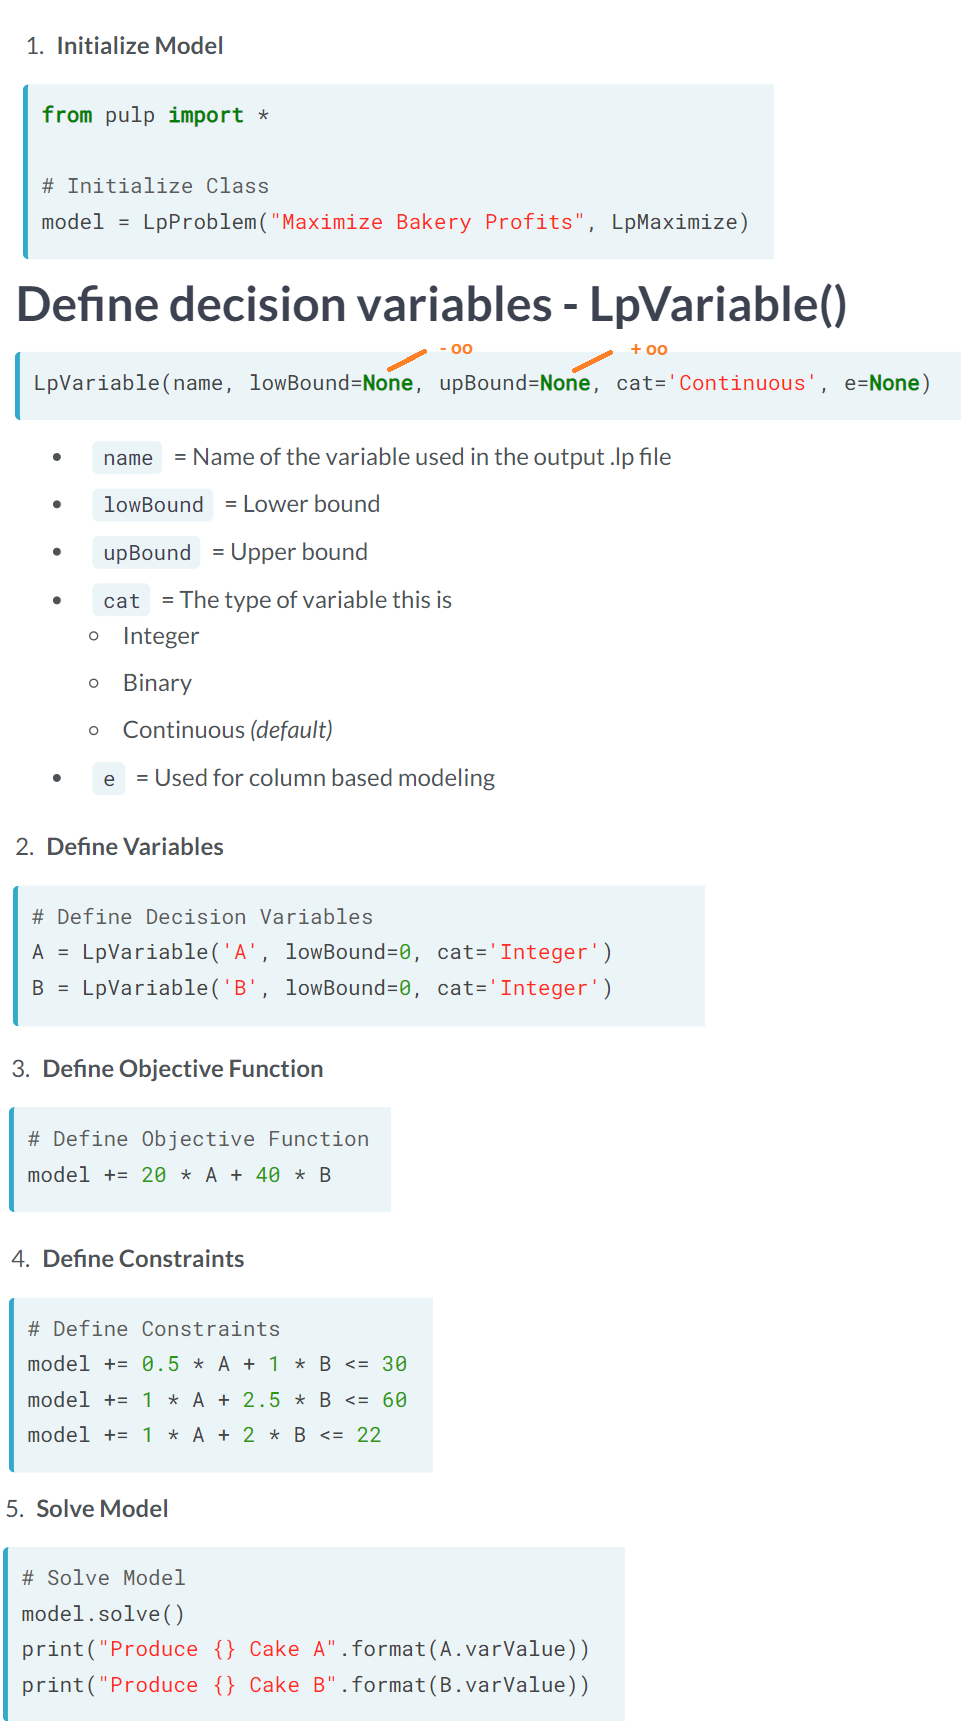

##  Simple Example - 2

- Simple resource scheduling exercise

In this exercise you are planning the production at a glass manufacturer. This manufacturer only produces wine and beer glasses: <br>

- there is a maximum production capacity of 60 hours
- each batch of wine and beer glasses takes 6 and 5 hours respectively
- the warehouse has a maximum capacity of 150 rack spaces
- each batch of the wine and beer glasses takes 10 and 20 spaces respectively
- the production equipment can only make full batches, no partial batches <br><br>

Also, we only have orders for 6 batches of wine glasses. Therefore, we do not want to produce more than this. Each batch of the wine glasses earns a profit of 5- DOLLARS and the beer 4.5DOLLARS

The objective is to maximize the profit for the manufacturer.

In [13]:
from pulp import *

In [14]:
# Initialize Class
model = LpProblem("Maximize Glass Co. Profits", LpMaximize)

# Define Decision Variables
wine = LpVariable('Wine', lowBound=0, upBound=None, cat='Integer')
beer = LpVariable('Beer', lowBound=0, upBound=None, cat='Integer')

# Define Objective Function
model += 5 * wine + 4.5 * beer      #TOTAL PROFIT (Max. This)

# Define Constraints
model += 6 * wine + 5 * beer <= 60     #Hours
model += 10 * wine + 20 * beer <= 150   #Racks
model += wine <= 6     #order of wine glasses batches

# Solve Model
model.solve()
print("Produce {} batches of wine glasses".format(wine.varValue))
print("Produce {} batches of beer glasses".format(beer.varValue))

C:\Users\Ashwin\Miniconda3\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Produce 6.0 batches of wine glasses
Produce 4.0 batches of beer glasses


## Using lpsum() to define a complex objective fucntion

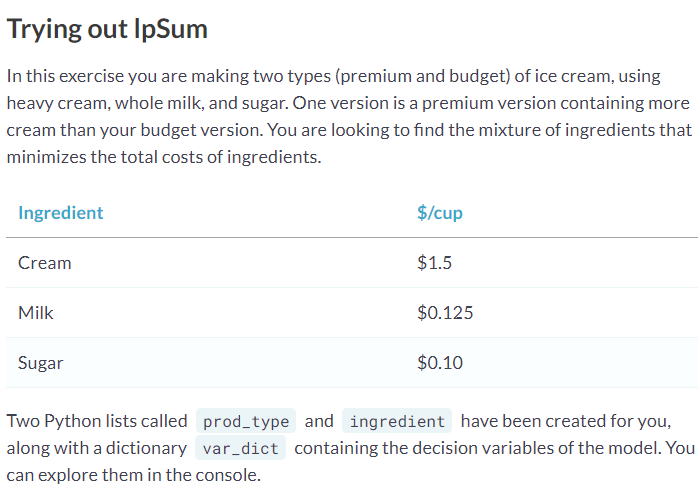

We want to minimize the cost of the following equation:

- ($1.5cp + $1.5cb + $0.125mp + $0.125mb + $0.1sp + $0.1sb) DOLLARS

- cp = Heavy cream in the premium ice cream (cups)
- cr = Heavy cream in the economy ice cream (cups)
- mp = Milk in the premium ice cream (cups)
- mr = Milk in the economy ice cream (cups)
- sp = Sugar in the premium ice cream (cups)
- sr = Sugar in the economy ice cream (cups)

In [18]:
cp = LpVariable('cp', lowBound=0, upBound=None)
cb = LpVariable('cb', lowBound=0, upBound=None)
mp = LpVariable('mp', lowBound=0, upBound=None)
mb = LpVariable('mb', lowBound=0, upBound=None)
sp = LpVariable('sp', lowBound=0, upBound=None)
sb = LpVariable('sb', lowBound=0, upBound=None)

In [19]:
prod_type = ['premium', 'budget']

ingredient = ['cream', 'milk', 'sugar']

var_dict  = {  ('budget', 'cream'): cb, ('budget', 'milk'): mb, ('budget', 'sugar'): sb,
               ('premium', 'cream'): cp, ('premium', 'milk'): mp, ('premium', 'sugar'): sp  }
#decision variables of the model

``` python
model += lpSum(vector(list))
```

In [20]:
# Define Objective Function
model += lpSum([1.5 * var_dict[(i, 'cream')] 
                + 0.125 * var_dict[(i, 'milk')] 
                + 0.10 * var_dict[(i, 'sugar')] 
                
                # Iterate over product types
                for i in prod_type])

C:\Users\Ashwin\Miniconda3\lib\site-packages\pulp\pulp.py:1380: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


## Example - 3 Logisitc Plannign Problem

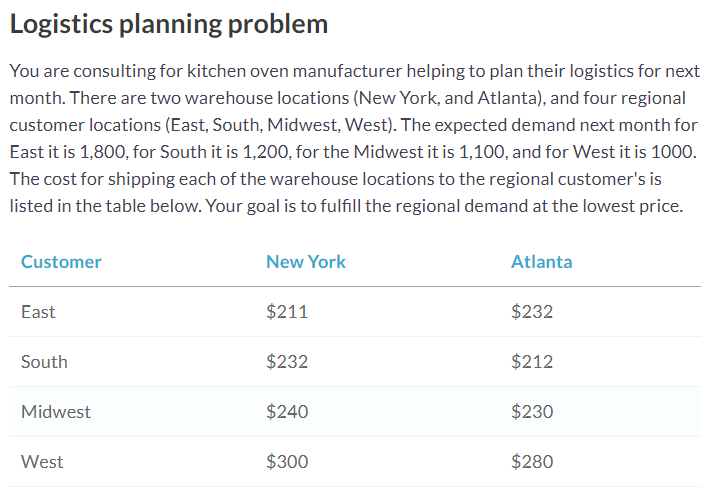

In [22]:
atle = LpVariable('atle', lowBound=0, upBound=None, cat='Integer')
atlm = LpVariable('atlm', lowBound=0, upBound=None, cat='Integer')
atls = LpVariable('atls', lowBound=0, upBound=None, cat='Integer')
atlw = LpVariable('atlw', lowBound=0, upBound=None, cat='Integer')
ne = LpVariable('ne', lowBound=0, upBound=None, cat='Integer')
nm = LpVariable('nm', lowBound=0, upBound=None, cat='Integer')
ns = LpVariable('ns', lowBound=0, upBound=None, cat='Integer')
nw = LpVariable('nw', lowBound=0, upBound=None, cat='Integer')

In [23]:
costs = {('Atlanta', 'East'): 232,
         ('Atlanta', 'Midwest'): 230,
         ('Atlanta', 'South'): 212,
         ('Atlanta', 'West'): 280,
         ('New York', 'East'): 211,
         ('New York', 'Midwest'): 240,
         ('New York', 'South'): 232,
         ('New York', 'West'): 300  }

var_dict = { ('Atlanta', 'East'): atle,
             ('Atlanta', 'Midwest'): atlm,
             ('Atlanta', 'South'): atls,
             ('Atlanta', 'West'): atlw,
             ('New York', 'East'): ne,
             ('New York', 'Midwest'): nm,
             ('New York', 'South'): ns,
             ('New York', 'West'): nw   }

In [24]:
# Initialize Model
model = LpProblem("Minimize Transportation Costs", LpMinimize)

- Create a list for the warehouse locations, the regional customers and the regional_demand respectively, making sure the demand and customer indices match, and zip the customers and regional_demand lists to build the demand dictionary.

In [29]:
# Build the lists and the demand dictionary
warehouse = ['New York', 'Atlanta']
customers = ['East', 'South', 'Midwest', 'West']
regional_demand = [1800, 1200, 1100, 1000]

In [30]:
demand = dict(zip(customers, regional_demand))
demand

{'East': 1800, 'South': 1200, 'Midwest': 1100, 'West': 1000}

In [31]:
[costs[(w, c)] * var_dict[(w, c)] 
                for c in customers for w in warehouse]

[211*ne + 0,
 232*atle + 0,
 232*ns + 0,
 212*atls + 0,
 240*nm + 0,
 230*atlm + 0,
 300*nw + 0,
 280*atlw + 0]

- Our decision variables in this exercise are the number of shipments for each warehouse and customer combination. You want to minimize the total cost of shipping. The total cost of shipping is the shipping costs along a route multiplied by the number of shipments along that route. Define the objective function using lpSum() with list comprehension, using the var_dict dictionary that was created for you, iterating over customers.

In [32]:
# Define Objective
model += lpSum([costs[(w, c)] * var_dict[(w, c)] 
                for c in customers for w in warehouse])

- Define the constraint using lpSum. Loop through the list of customers, and for each sum the shipments from the warehouses and set it equal to the customer demand. Remember we now have the customer demand as a dictionary with the customer name as the key.

In [36]:
for c in customers:
    print([var_dict[(w, c)] for w in warehouse] , demand[c])

[ne, atle] 1800
[ns, atls] 1200
[nm, atlm] 1100
[nw, atlw] 1000


In [33]:
# For each customer, sum warehouse shipments and set equal to customer demand
for c in customers:
    model += lpSum([var_dict[(w, c)] for w in warehouse]) == demand[c]

In [37]:
# Solve Model
model.solve()

1

In [ ]:
variables = [atle , atlm , atls , atlw , ne , nm , ns , nw]

In [43]:
for i in variables:
    print(str(i) ,':::', i.varValue)

atle ::: 0.0
atlm ::: 1100.0
atls ::: 1200.0
atlw ::: 1000.0
ne ::: 1800.0
nm ::: 0.0
ns ::: 0.0
nw ::: 0.0


## LpVariable dictionary function - Defining many Variables easily


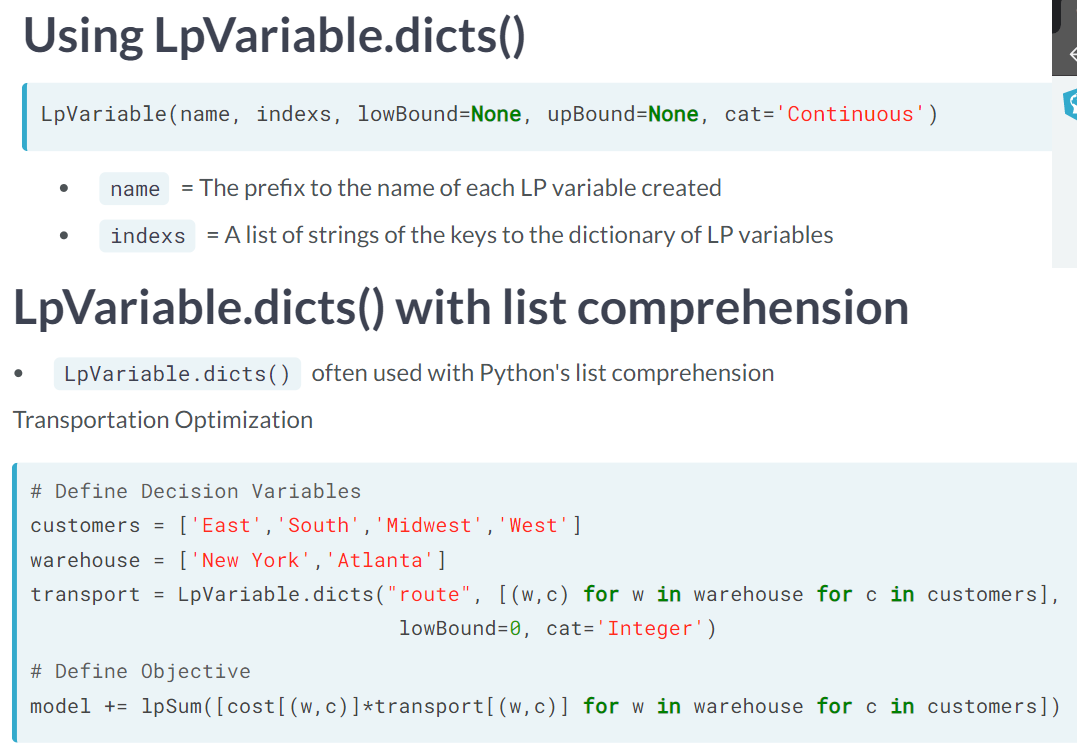

## Example - 4 : Logistics planning problem 2

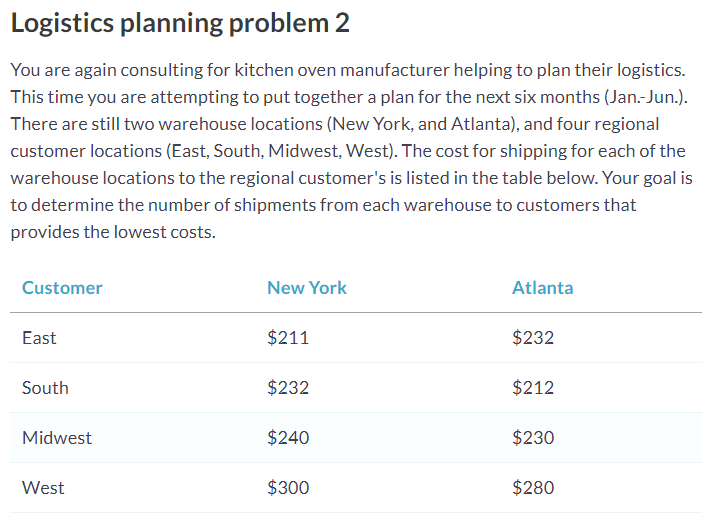

In [44]:
costs =  { ('Atlanta', 'East'): 232,
          ('Atlanta', 'Midwest'): 230,
          ('Atlanta', 'South'): 212,
          ('Atlanta', 'West'): 280,
          ('New York', 'East'): 211,
          ('New York', 'Midwest'): 240,
          ('New York', 'South'): 232,
          ('New York', 'West'): 300   }

months =  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

warehouse = ['New York', 'Atlanta']

customers = ['East', 'South', 'Midwest', 'West']

- Define the decision variables in the model by first using list comprehension to iterate over the months, warehouse, and customers lists to create a list of keys. Use that list of keys with LpVariable.dicts() to define the variables needed.


In [45]:
# Define decision variables
key = [(m, w, c) for m in months for w in warehouse for c in customers]
var_dict = LpVariable.dicts('num_of_shipments', 
                            key, 
                            lowBound=0, cat='Integer')

- Define the objective function by adding all the costs of shipping from a particular warehouse and customer over the six months.

In [50]:
# Use the LpVariable dictionary variable to define objective
model += lpSum([costs[(w, c)] * var_dict[(m, w, c)] 
                for m in months for w in warehouse for c in customers])

- Using LpVariable.dicts() allowed you to create 48 (6 months * 2 warehouses * 4 customers) individual decision variables for the model in a few lines of code.

## Example 5: Traveling salesman problem (TSP)

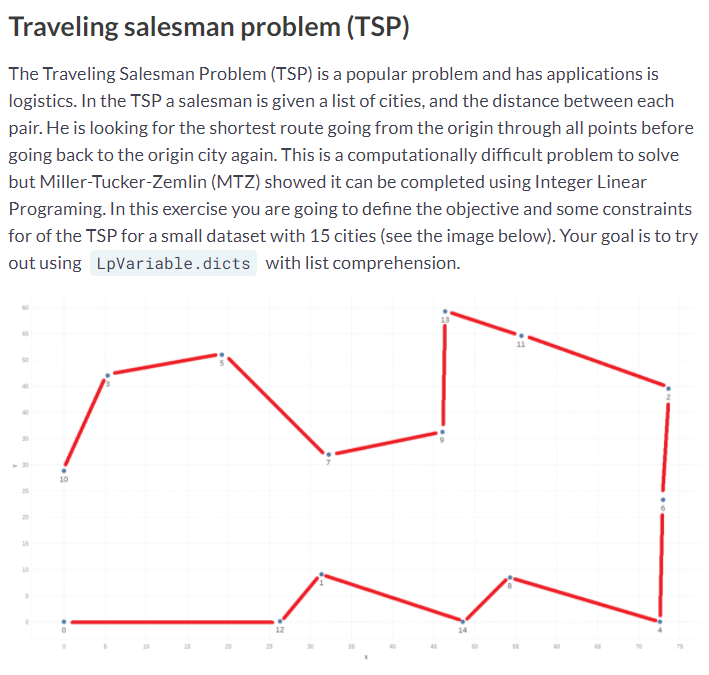

In [94]:
n = 15  # number of cities
cities =  range(0, 15) # list of the cities numbered

In [95]:
dist_ = np.array([[ 0, 29, 82, 46, 68, 52, 72, 42, 51, 55, 29, 74, 23, 72, 46],
       [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11, 52, 21],
       [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64, 31, 51],
       [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51, 43, 64],
       [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46, 65, 23],
       [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51, 29, 59],
       [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51, 46, 33],
       [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33, 31, 37],
       [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29, 51, 11],
       [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41, 23, 37],
       [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42, 59, 61],
       [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61, 11, 55],
       [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0, 62, 23],
       [72, 52, 31, 43, 65, 29, 46, 31, 51, 23, 59, 11, 62,  0, 59],
       [46, 21, 51, 64, 23, 59, 33, 37, 11, 37, 61, 55, 23, 59,  0]])
import pandas as pd
dist = pd.DataFrame(data=dist_, index=[np.arange(15)], columns=[np.arange(15)])
dist # pairwise distance between each city.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,29,82,46,68,52,72,42,51,55,29,74,23,72,46
1,29,0,55,46,42,43,43,23,23,31,41,51,11,52,21
2,82,55,0,68,46,55,23,43,41,29,79,21,64,31,51
3,46,46,68,0,82,15,72,31,62,42,21,51,51,43,64
4,68,42,46,82,0,74,23,52,21,46,82,58,46,65,23
5,52,43,55,15,74,0,61,23,55,31,33,37,51,29,59
6,72,43,23,72,23,61,0,42,23,31,77,37,51,46,33
7,42,23,43,31,52,23,42,0,33,15,37,33,33,31,37
8,51,23,41,62,21,55,23,33,0,29,62,46,29,51,11
9,55,31,29,42,46,31,31,15,29,0,51,21,41,23,37


- Use LpVariable.dicts to create a dictionary x holding binary variables for each city to city pair, and to create a dictionary u holding an integer LpVariable for each city.

In [96]:
[(c1, c2) for c1 in cities for c2 in cities]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (7, 0),
 (7, 1),
 (

In [97]:
[c1 for c1 in cities]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [98]:
# Define Decision Variables
x = LpVariable.dicts('X', [(c1, c2) for c1 in cities for c2 in cities], 
                     cat='Binary')
u = LpVariable.dicts('U', [c1 for c1 in cities], 
                     lowBound=0, upBound=(n-1), cat='Integer')

In [99]:
type(u[0])

pulp.pulp.LpVariable

- Define the objective function by summing together, the distance between each pair of cities multiplied by the binary decision variable x that you created earlier.

In [100]:
[dist.iloc[c1, c2] * x[(c1, c2)] 
                for c1 in cities for c2 in cities]

[0,
 29*X_(0,_1) + 0,
 82*X_(0,_2) + 0,
 46*X_(0,_3) + 0,
 68*X_(0,_4) + 0,
 52*X_(0,_5) + 0,
 72*X_(0,_6) + 0,
 42*X_(0,_7) + 0,
 51*X_(0,_8) + 0,
 55*X_(0,_9) + 0,
 29*X_(0,_10) + 0,
 74*X_(0,_11) + 0,
 23*X_(0,_12) + 0,
 72*X_(0,_13) + 0,
 46*X_(0,_14) + 0,
 29*X_(1,_0) + 0,
 0,
 55*X_(1,_2) + 0,
 46*X_(1,_3) + 0,
 42*X_(1,_4) + 0,
 43*X_(1,_5) + 0,
 43*X_(1,_6) + 0,
 23*X_(1,_7) + 0,
 23*X_(1,_8) + 0,
 31*X_(1,_9) + 0,
 41*X_(1,_10) + 0,
 51*X_(1,_11) + 0,
 11*X_(1,_12) + 0,
 52*X_(1,_13) + 0,
 21*X_(1,_14) + 0,
 82*X_(2,_0) + 0,
 55*X_(2,_1) + 0,
 0,
 68*X_(2,_3) + 0,
 46*X_(2,_4) + 0,
 55*X_(2,_5) + 0,
 23*X_(2,_6) + 0,
 43*X_(2,_7) + 0,
 41*X_(2,_8) + 0,
 29*X_(2,_9) + 0,
 79*X_(2,_10) + 0,
 21*X_(2,_11) + 0,
 64*X_(2,_12) + 0,
 31*X_(2,_13) + 0,
 51*X_(2,_14) + 0,
 46*X_(3,_0) + 0,
 46*X_(3,_1) + 0,
 68*X_(3,_2) + 0,
 0,
 82*X_(3,_4) + 0,
 15*X_(3,_5) + 0,
 72*X_(3,_6) + 0,
 31*X_(3,_7) + 0,
 62*X_(3,_8) + 0,
 42*X_(3,_9) + 0,
 21*X_(3,_10) + 0,
 51*X_(3,_11) + 0,
 51*X_(3,_12)

In [101]:
# Define Objective
model += lpSum([dist.iloc[c1, c2] * x[(c1, c2)] 
                for c1 in cities for c2 in cities])

C:\Users\Ashwin\Miniconda3\lib\site-packages\pulp\pulp.py:1380: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


- Use the x binary variable to define a set of constraints to requires that each city be arrived at from exactly one other city, and a second set of constraints that requires that from each city there is a departure to exactly one other city.

In [102]:
for c2 in cities:
    print([x[(c1, c2)] for c1 in cities])

[X_(0,_0), X_(1,_0), X_(2,_0), X_(3,_0), X_(4,_0), X_(5,_0), X_(6,_0), X_(7,_0), X_(8,_0), X_(9,_0), X_(10,_0), X_(11,_0), X_(12,_0), X_(13,_0), X_(14,_0)]
[X_(0,_1), X_(1,_1), X_(2,_1), X_(3,_1), X_(4,_1), X_(5,_1), X_(6,_1), X_(7,_1), X_(8,_1), X_(9,_1), X_(10,_1), X_(11,_1), X_(12,_1), X_(13,_1), X_(14,_1)]
[X_(0,_2), X_(1,_2), X_(2,_2), X_(3,_2), X_(4,_2), X_(5,_2), X_(6,_2), X_(7,_2), X_(8,_2), X_(9,_2), X_(10,_2), X_(11,_2), X_(12,_2), X_(13,_2), X_(14,_2)]
[X_(0,_3), X_(1,_3), X_(2,_3), X_(3,_3), X_(4,_3), X_(5,_3), X_(6,_3), X_(7,_3), X_(8,_3), X_(9,_3), X_(10,_3), X_(11,_3), X_(12,_3), X_(13,_3), X_(14,_3)]
[X_(0,_4), X_(1,_4), X_(2,_4), X_(3,_4), X_(4,_4), X_(5,_4), X_(6,_4), X_(7,_4), X_(8,_4), X_(9,_4), X_(10,_4), X_(11,_4), X_(12,_4), X_(13,_4), X_(14,_4)]
[X_(0,_5), X_(1,_5), X_(2,_5), X_(3,_5), X_(4,_5), X_(5,_5), X_(6,_5), X_(7,_5), X_(8,_5), X_(9,_5), X_(10,_5), X_(11,_5), X_(12,_5), X_(13,_5), X_(14,_5)]
[X_(0,_6), X_(1,_6), X_(2,_6), X_(3,_6), X_(4,_6), X_(5,_6), X_(

In [103]:
for c1 in cities:
    print([x[(c1, c2)] for c2 in cities])

[X_(0,_0), X_(0,_1), X_(0,_2), X_(0,_3), X_(0,_4), X_(0,_5), X_(0,_6), X_(0,_7), X_(0,_8), X_(0,_9), X_(0,_10), X_(0,_11), X_(0,_12), X_(0,_13), X_(0,_14)]
[X_(1,_0), X_(1,_1), X_(1,_2), X_(1,_3), X_(1,_4), X_(1,_5), X_(1,_6), X_(1,_7), X_(1,_8), X_(1,_9), X_(1,_10), X_(1,_11), X_(1,_12), X_(1,_13), X_(1,_14)]
[X_(2,_0), X_(2,_1), X_(2,_2), X_(2,_3), X_(2,_4), X_(2,_5), X_(2,_6), X_(2,_7), X_(2,_8), X_(2,_9), X_(2,_10), X_(2,_11), X_(2,_12), X_(2,_13), X_(2,_14)]
[X_(3,_0), X_(3,_1), X_(3,_2), X_(3,_3), X_(3,_4), X_(3,_5), X_(3,_6), X_(3,_7), X_(3,_8), X_(3,_9), X_(3,_10), X_(3,_11), X_(3,_12), X_(3,_13), X_(3,_14)]
[X_(4,_0), X_(4,_1), X_(4,_2), X_(4,_3), X_(4,_4), X_(4,_5), X_(4,_6), X_(4,_7), X_(4,_8), X_(4,_9), X_(4,_10), X_(4,_11), X_(4,_12), X_(4,_13), X_(4,_14)]
[X_(5,_0), X_(5,_1), X_(5,_2), X_(5,_3), X_(5,_4), X_(5,_5), X_(5,_6), X_(5,_7), X_(5,_8), X_(5,_9), X_(5,_10), X_(5,_11), X_(5,_12), X_(5,_13), X_(5,_14)]
[X_(6,_0), X_(6,_1), X_(6,_2), X_(6,_3), X_(6,_4), X_(6,_5), X_(

In [104]:
# Define Constraints
for c2 in cities:
    model += lpSum([x[(c1, c2)] for c1 in cities]) == 1
for c1 in cities:
    model += lpSum([x[(c1, c2)] for c2 in cities]) == 1

In [105]:
model.solve()

PulpSolverError: Pulp: Error while executing C:\Users\Ashwin\Miniconda3\lib\site-packages\pulp\solverdir\cbc\win\64\cbc.exe

https://campus.datacamp.com/courses/supply-chain-analytics-in-python/modeling-in-pulp?ex=4